In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("Titanic.csv")
dataset.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


In [4]:
dataset.describe()

,age,sibsp,parch,fare,survived
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,0.383838
std,14.526497,1.102743,0.806057,49.693429,0.486592
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400,0.000000
50%,28.000000,0.000000,0.000000,14.454200,0.000000
75%,38.000000,1.000000,0.000000,31.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000


In [5]:
dataset.shape

(891, 10)

In [6]:
dataset.isnull().any()

sex         False
age          True
sibsp       False
parch       False
fare        False
embarked     True
class       False
who         False
alone       False
survived    False
dtype: bool

In [7]:
dataset["age"] = dataset["age"].fillna(dataset["age"].mean())
dataset['embarked']=dataset['embarked'].fillna(dataset['embarked'].mode()[0])
dataset.isnull().any()

sex         False
age         False
sibsp       False
parch       False
fare        False
embarked    False
class       False
who         False
alone       False
survived    False
dtype: bool

In [8]:
dataset['class'].unique()

array(['Third', 'First', 'Second'], dtype=object)

In [9]:
dataset['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [10]:
dataset['alone'].unique()

array([False,  True])

In [12]:
dataset["sex"] = [1 if i == "male" else i for i in dataset["sex"]]
dataset['sex']=[0 if i=='female' else i for i in dataset['sex']]
dataset["embarked"] = [0 if i == "S" else i for i in dataset["embarked"]] 
dataset["embarked"] = [1 if i == "C" else i for i in dataset["embarked"]] 
dataset["embarked"] = [2 if i == "Q" else i for i in dataset["embarked"]] 
dataset['class']=[1 if i=='First' else i for i in dataset['class']]
dataset['class']=[2 if i=='Second' else i for i in dataset['class']]
dataset['class']=[3 if i=='Third' else i for i in dataset['class']]
dataset['who']=[0 if i=='child' else i for i in dataset['who']]
dataset['who']=[1 if i=='woman' else i for i in dataset['who']]
dataset['who']=[2 if i=='man' else i for i in dataset['who']]
dataset['alone']=[1 if i==True else i for i in dataset['alone']]
dataset['alone']=[0 if i==False else i for i in dataset['alone']]
dataset.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,1,22.0,1,0,7.2500,0,3,2,0,0
1,0,38.0,1,0,71.2833,1,1,1,0,1
2,0,26.0,0,0,7.9250,0,3,1,1,1
3,0,35.0,1,0,53.1000,0,1,1,0,1
4,1,35.0,0,0,8.0500,0,3,2,1,0


In [13]:
dataset.sex.value_counts()

sex
1    577
0    314
Name: count, dtype: int64

In [14]:
dataset.sibsp.value_counts()

sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [15]:
dataset.parch.value_counts()

parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [16]:
dataset.embarked.value_counts()

embarked
0    646
1    168
2     77
Name: count, dtype: int64

In [18]:
dataset.who.value_counts()

who
2    537
1    271
0     83
Name: count, dtype: int64

In [19]:
dataset.alone.value_counts()

alone
1    537
0    354
Name: count, dtype: int64

In [20]:
dataset.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

<Axes: >

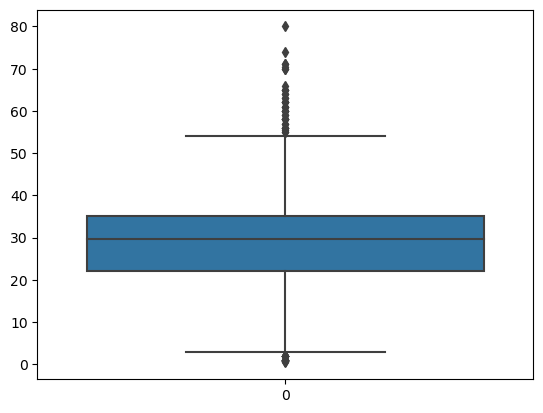

In [23]:
sns.boxplot(dataset.age)

<Axes: >

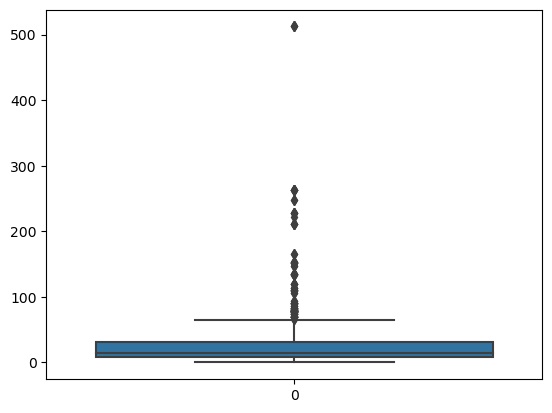

In [24]:
sns.boxplot(dataset.fare)

In [25]:
x=dataset.iloc[:,:9]
y=dataset.iloc[:,9:10]
x.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone
0,1,22.0,1,0,7.2500,0,3,2,0
1,0,38.0,1,0,71.2833,1,1,1,0
2,0,26.0,0,0,7.9250,0,3,1,1
3,0,35.0,1,0,53.1000,0,1,1,0
4,1,35.0,0,0,8.0500,0,3,2,1


In [26]:
y.head()

,survived
0,0
1,1
2,1
3,1
4,0


In [27]:
x.shape

(891, 9)

In [29]:
y.shape

(891, 1)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((623, 9), (268, 9), (623, 1), (268, 1))

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
x_train

array([[ 0.72592065,  1.62393675, -0.457246  , ..., -1.5325562 ,
         0.73448723,  0.80778703],
       [-1.37756104,  1.47020331,  0.4033711 , ..., -1.5325562 ,
        -0.78573052, -1.23795005],
       [ 0.72592065, -2.21939923,  3.8458395 , ...,  0.84844757,
        -2.30594828, -1.23795005],
       ...,
       [ 0.72592065, -0.0133922 , -0.457246  , ...,  0.84844757,
         0.73448723,  0.80778703],
       [-1.37756104,  0.47093596,  0.4033711 , ...,  0.84844757,
        -0.78573052, -1.23795005],
       [ 0.72592065,  2.31573723,  0.4033711 , ..., -0.34205431,
         0.73448723, -1.23795005]])